<a href="https://colab.research.google.com/github/lucasegonzalez/Notebooks/blob/main/Arbol_de_desicion_clasificador_con_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [4]:
test_df = pd.read_csv('/content/titanic-test.csv')
train_df = pd.read_csv('/content/titanic-train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


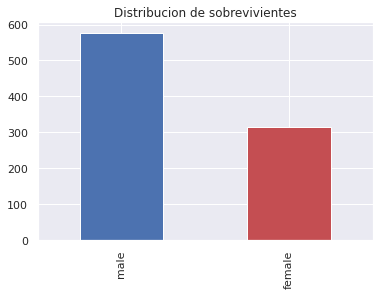

In [5]:
train_df.Sex.value_counts().plot(kind = 'bar' , color = ['b', 'r'])
plt.title('Distribucion de sobrevivientes')
plt.show()

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df ['Embarked'].fillna('S')

In [17]:
train_predictors = train_df.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1) #axis=1 se refiere a las columnas (axis=0 → filas)

In [32]:
categorical_cols = [cname for cname in train_predictors.columns if 
                    train_predictors[cname].nunique() <10
                    and train_predictors[cname].dtype=='object']



In [19]:
numerical_cols = [cname for cname in train_predictors.columns if
                  train_predictors[cname].dtype in ['int64', 'float64']]

In [20]:
my_cols = categorical_cols + numerical_cols
train_predictors = train_predictors[my_cols]


In [21]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [22]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values


In [24]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one, y_target, test_size = .25, random_state = 1)

In [25]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train,y_train)

In [26]:
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print('Accuracy: %0.4f' % (tree_one_accuracy))


Accuracy: 0.9282


In [30]:
pip install pydotplus

In [31]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file=out) # exportamos los datos del árbol en lenguaje graphviz a StringIO
graph = pydotplus.graph_from_dot_data(out.getvalue()) #generamos el gráfico a través de pydotplus
graph.write_png('titanic.png') #guardamos el archivo en formato png

True